In [1]:
import numpy as np 
import itertools 
from calc_minima import *

def outer_sq(a):
    return np.outer(a, a)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sbm_samp_fn(sbm_probs, sbm_matrix, params, fname):
    # Plot the minima and calc the difference between the optima
    plot_block_fn_grid(sbm_probs, sbm_matrix, params)
    calc_gap_between_optima(sbm_probs, sbm_matrix, params)
    # Calc the different minima
    optima_dict = calc_optima_dict(sbm_probs, sbm_matrix, params)
    # Save the original and learned SBMs 
    np.savez_compressed(fname,
                        sbm_probs=sbm_probs,
                        sbm_matrix=sbm_matrix,
                        params=params,
                        **optima_dict)

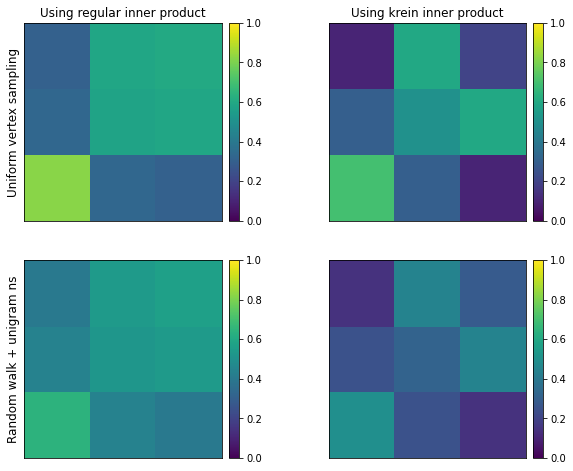

Row/column 0: Uniform vertex sampling with regular IP
Row/column 1: Uniform vertex sampling with krein IP
Row/column 2: Random walk + unigram NS with regular IP
Row/column 3: Random walk + unigram NS with krein IP
Row/column 4: Skipgram + unigram NS with regular IP
Row/column 5: Skipgram + unigram NS with krein IP
[[0.     0.6629 0.3898 0.8842 0.3898 0.8842]
 [0.6629 0.     0.8129 0.5161 0.8129 0.5161]
 [0.3898 0.8129 0.     0.8845 0.     0.8845]
 [0.8842 0.5161 0.8845 0.     0.8845 0.    ]
 [0.3898 0.8129 0.     0.8845 0.     0.8845]
 [0.8842 0.5161 0.8845 0.     0.8845 0.    ]]


In [3]:
# Example 1

sbm_probs = np.array([1/3, 1/3, 1/3])
sbm_matrix = np.array([[0.7, 0.3, 0.1],
                       [0.3, 0.5, 0.6],
                       [0.1, 0.6, 0.2]])

params = {'num_edges':800, 'num_negative':2, 'alpha':0.75, 
          'num_vertex':2, 'ns_non_edge':False, 'window_length': 1}
fname = '../../data/sbm1.npz'

# This works fine, except for the skipgram...)
sbm_samp_fn(sbm_probs, sbm_matrix, params, fname)

[[0.7451955  0.87484348 0.02474351 0.80859391 0.25380891]
 [0.87484348 0.92942974 0.58332562 0.48292302 0.45177211]
 [0.02474351 0.58332562 0.67906468 0.14560492 0.47552179]
 [0.80859391 0.48292302 0.14560492 0.80489514 0.92418613]
 [0.25380891 0.45177211 0.47552179 0.92418613 0.62241412]]


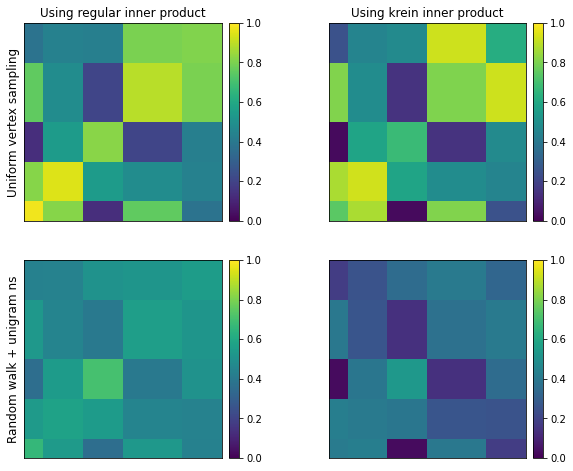

Row/column 0: Uniform vertex sampling with regular IP
Row/column 1: Uniform vertex sampling with krein IP
Row/column 2: Random walk + unigram NS with regular IP
Row/column 3: Random walk + unigram NS with krein IP
Row/column 4: Skipgram + unigram NS with regular IP
Row/column 5: Skipgram + unigram NS with krein IP
[[0.     0.5211 0.8706 1.3474 0.8706 1.3474]
 [0.5211 0.     1.0212 1.2498 1.0212 1.2498]
 [0.8706 1.0212 0.     0.8873 0.     0.8873]
 [1.3474 1.2498 0.8873 0.     0.8873 0.    ]
 [0.8706 1.0212 0.     0.8873 0.     0.8873]
 [1.3474 1.2498 0.8873 0.     0.8873 0.    ]]


In [4]:
# Example 2

sbm_probs = np.array([0.1, 0.2, 0.2, 0.3, 0.2])

sbm_matrix = np.triu(np.random.uniform(size=(5, 5)))
sbm_matrix = sbm_matrix + sbm_matrix.T
np.fill_diagonal(sbm_matrix, np.diag(sbm_matrix)/2)

sbm_matrix = np.array([[0.7451955, 0.87484348, 0.02474351, 0.80859391, 0.25380891],
                       [0.87484348, 0.92942974, 0.58332562, 0.48292302, 0.45177211],
                       [0.02474351, 0.58332562, 0.67906468, 0.14560492, 0.47552179],
                       [0.80859391, 0.48292302, 0.14560492, 0.80489514, 0.92418613],
                       [0.25380891, 0.45177211, 0.47552179, 0.92418613, 0.62241412]])

print(sbm_matrix)

params = {'num_edges':800, 'num_negative':2, 'alpha':0.75, 
          'num_vertex':2, 'ns_non_edge':False, 'window_length': 1}
fname = '../../data/sbm2.npz'

# This works fine, except for the skipgram...)
sbm_samp_fn(sbm_probs, sbm_matrix, params, fname)